# Natural Language Processing (NLP)

References:

* [Introduction to NLP in Python](https://campus.datacamp.com/courses/introduction-to-natural-language-processing-in-python/regular-expressions-word-tokenization)
* [Machine Learning with Python Cookbook](https://www.amazon.com/Machine-Learning-Python-Cookbook-Preprocessing/dp/1491989386)

In [165]:
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, regexp_tokenize, TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from collections import Counter
from gensim.corpora.dictionary import Dictionary
from gensim.models import TfidfModel
from collections import defaultdict 
import itertools
import spacy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

## Removing punctuation

In [166]:
import unicodedata
import sys

text = ["Yo! This is inspired by Chris Albon's 6.3 Removing Punctuation example.", "It's in his book linked above!"]

# sys.maxunicode is "An integer giving the largest supported code point for a Unicode character."
punctuation = dict.fromkeys(i for i in range(sys.maxunicode) if unicodedata.category(chr(i)).startswith('P'))

# There are other ways to remove punction characters, but this method is very fast
[string.translate(punctuation) for string in text]

['Yo This is inspired by Chris Albons 63 Removing Punctuation example',
 'Its in his book linked above']

## Tokenize Words

In [167]:
text = nltk.corpus.gutenberg.raw('shakespeare-macbeth.txt')[0:10000]

word_tokenize(text)

['[',
 'The',
 'Tragedie',
 'of',
 'Macbeth',
 'by',
 'William',
 'Shakespeare',
 '1603',
 ']',
 'Actus',
 'Primus',
 '.',
 'Scoena',
 'Prima',
 '.',
 'Thunder',
 'and',
 'Lightning',
 '.',
 'Enter',
 'three',
 'Witches',
 '.',
 '1',
 '.',
 'When',
 'shall',
 'we',
 'three',
 'meet',
 'againe',
 '?',
 'In',
 'Thunder',
 ',',
 'Lightning',
 ',',
 'or',
 'in',
 'Raine',
 '?',
 '2',
 '.',
 'When',
 'the',
 'Hurley-burley',
 "'s",
 'done',
 ',',
 'When',
 'the',
 'Battaile',
 "'s",
 'lost',
 ',',
 'and',
 'wonne',
 '3',
 '.',
 'That',
 'will',
 'be',
 'ere',
 'the',
 'set',
 'of',
 'Sunne',
 '1',
 '.',
 'Where',
 'the',
 'place',
 '?',
 '2',
 '.',
 'Vpon',
 'the',
 'Heath',
 '3',
 '.',
 'There',
 'to',
 'meet',
 'with',
 'Macbeth',
 '1',
 '.',
 'I',
 'come',
 ',',
 'Gray-Malkin',
 'All',
 '.',
 'Padock',
 'calls',
 'anon',
 ':',
 'faire',
 'is',
 'foule',
 ',',
 'and',
 'foule',
 'is',
 'faire',
 ',',
 'Houer',
 'through',
 'the',
 'fogge',
 'and',
 'filthie',
 'ayre',
 '.',
 'Exeunt',
 '.

## Tokenize Sentences

In [168]:
sent_tokenize(text)[:3]

['[The Tragedie of Macbeth by William Shakespeare 1603]\n\n\nActus Primus.',
 'Scoena Prima.',
 'Thunder and Lightning.']

### Unique words

In [169]:
set(word_tokenize(text))

{'&',
 "'",
 "'Gainst",
 "'d",
 "'gainst",
 "'gins",
 "'re",
 "'s",
 "'t",
 '(',
 ')',
 ',',
 '.',
 '1',
 '1603',
 '2',
 '3',
 ':',
 ';',
 '?',
 'A',
 'Act',
 'Actus',
 'Against',
 'Alarum',
 'Aleppo',
 'All',
 'And',
 'Ang',
 'Angus',
 'Are',
 'Arme',
 'Armes',
 'Aroynt',
 'Art',
 'As',
 'Assisted',
 'Ayre',
 'B',
 'Banners',
 'Banq',
 'Banquo',
 'Banquoh',
 'Barke',
 'Battaile',
 'Battlements',
 'Beards',
 'Began',
 'Bellona',
 'Besides',
 'Bosome',
 'Bridegroome',
 'Broyle',
 'But',
 'By',
 'Can',
 'Cannons',
 'Cap',
 'Capitall',
 'Captaine',
 'Captaines',
 'Captiuitie',
 'Card',
 'Cawdor',
 'Chance',
 'Charme',
 'Chestnuts',
 'Children',
 'Chops',
 'Colmes',
 'Commencing',
 'Compell',
 'Conflict',
 'Confronted',
 'Countreyes',
 'Cousin',
 'Cousins',
 'Cracks',
 'Craues',
 'Crowne',
 'Curbing',
 'Darknesse',
 'Day',
 'Deuill',
 'Discomfort',
 'Disdayning',
 'Dismay',
 'Doe',
 'Dollars',
 'Donalbaine',
 'Doubtfull',
 'Drum',
 'Drumme',
 'Eagles',
 'Earth',
 'Enter',
 'Except',
 'Exeu

## Tweet Tokenizer

In [170]:
tweet = 'IMO hashtags are #lame @mhmazur'
TweetTokenizer().tokenize(tweet)

['IMO', 'hashtags', 'are', '#lame', '@mhmazur']

## Charting token lengths

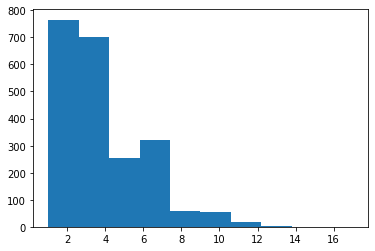

In [171]:
words = word_tokenize(text)
lengths = [len(word) for word in words]

plt.hist(lengths)
plt.show()

## Counting token frequencies

In [172]:
counter = Counter(word_tokenize(text))
counter

Counter({'[': 1,
         'The': 14,
         'Tragedie': 1,
         'of': 39,
         'Macbeth': 15,
         'by': 3,
         'William': 1,
         'Shakespeare': 1,
         '1603': 1,
         ']': 1,
         'Actus': 1,
         'Primus': 1,
         '.': 111,
         'Scoena': 1,
         'Prima': 1,
         'Thunder': 3,
         'and': 34,
         'Lightning': 2,
         'Enter': 6,
         'three': 3,
         'Witches': 3,
         '1': 12,
         'When': 4,
         'shall': 8,
         'we': 4,
         'meet': 2,
         'againe': 2,
         '?': 29,
         'In': 5,
         ',': 209,
         'or': 6,
         'in': 13,
         'Raine': 1,
         '2': 8,
         'the': 50,
         'Hurley-burley': 1,
         "'s": 9,
         'done': 2,
         'Battaile': 1,
         'lost': 3,
         'wonne': 2,
         '3': 8,
         'That': 9,
         'will': 4,
         'be': 15,
         'ere': 1,
         'set': 1,
         'Sunne': 2,
         'Where':

## Identifying most common tokens

In [173]:
counter.most_common(5)

[(',', 209), ('.', 111), ('the', 50), (':', 41), ('of', 39)]

## Removing stopwords

In [174]:
alpha_only = [token for token in word_tokenize(text.lower()) if token.isalpha()]
no_stops = [token for token in alpha_only if token not in stopwords.words('english')]
no_stops

['tragedie',
 'macbeth',
 'william',
 'shakespeare',
 'actus',
 'primus',
 'scoena',
 'prima',
 'thunder',
 'lightning',
 'enter',
 'three',
 'witches',
 'shall',
 'three',
 'meet',
 'againe',
 'thunder',
 'lightning',
 'raine',
 'done',
 'battaile',
 'lost',
 'wonne',
 'ere',
 'set',
 'sunne',
 'place',
 'vpon',
 'heath',
 'meet',
 'macbeth',
 'come',
 'padock',
 'calls',
 'anon',
 'faire',
 'foule',
 'foule',
 'faire',
 'houer',
 'fogge',
 'filthie',
 'ayre',
 'exeunt',
 'scena',
 'secunda',
 'alarum',
 'within',
 'enter',
 'king',
 'malcome',
 'donalbaine',
 'lenox',
 'attendants',
 'meeting',
 'bleeding',
 'captaine',
 'king',
 'bloody',
 'man',
 'report',
 'seemeth',
 'plight',
 'reuolt',
 'newest',
 'state',
 'mal',
 'serieant',
 'like',
 'good',
 'hardie',
 'souldier',
 'fought',
 'captiuitie',
 'haile',
 'braue',
 'friend',
 'say',
 'king',
 'knowledge',
 'broyle',
 'thou',
 'didst',
 'leaue',
 'cap',
 'doubtfull',
 'stood',
 'two',
 'spent',
 'swimmers',
 'doe',
 'cling',
 'to

In [175]:
Counter(no_stops).most_common(3)

[('king', 19), ('thane', 17), ('macbeth', 15)]

## Stemming

Stemming tries to convert words into their root forms by identifying and removing affies while keeping the root meaning of the word.

> Stemming usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes. ([#](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html))

In [176]:
tokenized_words = word_tokenize("I saw six bats flying through the sky")

porter = PorterStemmer()

[porter.stem(word) for word in tokenized_words]

['I', 'saw', 'six', 'bat', 'fli', 'through', 'the', 'sky']

## Lemmatizer

> Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma. ([#](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html))

In [177]:
wordnet_lemmatizer = WordNetLemmatizer()

[wordnet_lemmatizer.lemmatize(token) for token in tokenized_words]

['I', 'saw', 'six', 'bat', 'flying', 'through', 'the', 'sky']

In [178]:
Counter(lemmatized).most_common(3)

[('king', 22), ('thane', 17), ('macbeth', 15)]

# Gensim

In [179]:
raw = ["There is a cat near the cat", "There is a dog"]
articles = [word_tokenize(article.lower()) for article in raw]

dictionary = Dictionary(articles)
for index, article in enumerate(articles):
    print("\nArticle", str(index + 1) + ":")
    for token in article:
        print(" ", token + ":", dictionary.token2id.get(token))
    
corpus = [dictionary.doc2bow(article) for article in articles]

# First element of each tuple is the id of the token
# Second element is number of times it appears in the article
print("\nCorpus", corpus)

bow_doc = sorted(corpus[0], key=lambda w: w[1], reverse=True)
print("\nFirst doc sorted by occurrences:", bow_doc)

print("\nTop words in first doc:")
for word_id, word_count in bow_doc[:3]:
    print(" ", dictionary.get(word_id), word_count)
    
total_word_count = defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count

print("\nTotal word counts:")
print(total_word_count.items())

sorted_word_count = sorted(total_word_count.items(), key=lambda w: w[1], reverse=True) 

print("\nTop 5 words across corpus:")
for word_id, word_count in sorted_word_count[:5]:
    print(" ", dictionary.get(word_id), word_count)


Article 1:
  there: 5
  is: 2
  a: 0
  cat: 1
  near: 3
  the: 4
  cat: 1

Article 2:
  there: 5
  is: 2
  a: 0
  dog: 6

Corpus [[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1)], [(0, 1), (2, 1), (5, 1), (6, 1)]]

First doc sorted by occurrences: [(1, 2), (0, 1), (2, 1), (3, 1), (4, 1), (5, 1)]

Top words in first doc:
  cat 2
  a 1
  is 1

Total word counts:
dict_items([(0, 2), (1, 2), (2, 2), (3, 1), (4, 1), (5, 2), (6, 1)])

Top 5 words across corpus:
  a 2
  cat 2
  is 2
  there 2
  near 1


## Gensim Tfidf

In [180]:
print("article:", raw[0])

doc = corpus[0]
print("\ndoc:", doc)

tfidf = TfidfModel(corpus)
tfidf_weights = tfidf[doc]
print("\ntfidf_weights:", tfidf_weights)

sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)

# Print the top 2 weighted words
print("\nTop 2 terms:")
for term_id, weight in sorted_tfidf_weights[:2]:
    print(dictionary.get(term_id), weight)

article: There is a cat near the cat

doc: [(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1)]

tfidf_weights: [(1, 0.8164965809277261), (3, 0.4082482904638631), (4, 0.4082482904638631)]

Top 2 terms:
cat 0.8164965809277261
near 0.4082482904638631


# Name Entity Recognition

## Identifying parts of speech

* See [list of tags](https://pythonprogramming.net/part-of-speech-tagging-nltk-tutorial/) for what each acronym represents

In [181]:
sentences = ["John Gleen as an astronaut in NASA."]
parts_of_speech = [nltk.pos_tag(word_tokenize(sentence)) for sentence in sentences]
parts_of_speech

[[('John', 'NNP'),
  ('Gleen', 'NNP'),
  ('as', 'IN'),
  ('an', 'DT'),
  ('astronaut', 'NN'),
  ('in', 'IN'),
  ('NASA', 'NNP'),
  ('.', '.')]]

## Identifying Named Entities with nltk

Name Entities are people, organizations, etc

In [182]:
chunked_sentences = nltk.ne_chunk_sents(parts_of_speech, binary=True)

for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)


(NE John/NNP Gleen/NNP)
(NE NASA/NNP)


## Identifying Named Entities with spaCy

In [183]:
# Need to run `$ python3 -m spacy download en` beforehand
nlp = spacy.load("en", tagger=False, parser=False, matcher=False)

doc = nlp("John Gleen as an astronaut in NASA.")

# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)


PERSON John Gleen
ORG NASA


## Encoding text as a bag of words with Count Vectorizer

CountVectorizer will count how many times each word is in a string.

In [184]:
# stop_words="english" will remove stop words like "is" and "a" here
count_vectorizer = CountVectorizer(stop_words="english")

X = ["Sola runs", "Sola scratches Sola", "Sola chews toy dogs"]
X_transformed = count_vectorizer.fit_transform(X)

print("Feature Names:", count_vectorizer.get_feature_names())
print("\nVocabulary:", count_vectorizer.vocabulary_)

df = pd.DataFrame(X_transformed.todense(), columns=count_vectorizer.get_feature_names())
display(df)

Feature Names: ['chews', 'dogs', 'runs', 'scratches', 'sola', 'toy']

Vocabulary: {'sola': 4, 'runs': 2, 'scratches': 3, 'chews': 0, 'toy': 5, 'dogs': 1}


,chews,dogs,runs,scratches,sola,toy
0,0,0,1,0,1,0
1,0,0,0,1,2,0
2,1,1,0,0,1,1


## Identifying 1 and 2 grams

In [185]:
count_vectorizer = CountVectorizer(stop_words="english", ngram_range=(1, 2))

X = ["Sola runs", "Sola scratches Sola", "Sola chews toy dogs"]
X_transformed = count_vectorizer.fit_transform(X)

print("Feature Names:", count_vectorizer.get_feature_names())
print("\nVocabulary:", count_vectorizer.vocabulary_)

df = pd.DataFrame(X_transformed.todense(), columns=count_vectorizer.get_feature_names())
display(df)

Feature Names: ['chews', 'chews toy', 'dogs', 'runs', 'scratches', 'scratches sola', 'sola', 'sola chews', 'sola runs', 'sola scratches', 'toy', 'toy dogs']

Vocabulary: {'sola': 6, 'runs': 3, 'sola runs': 8, 'scratches': 4, 'sola scratches': 9, 'scratches sola': 5, 'chews': 0, 'toy': 10, 'dogs': 2, 'sola chews': 7, 'chews toy': 1, 'toy dogs': 11}


,chews,chews toy,dogs,runs,scratches,scratches sola,sola,sola chews,sola runs,sola scratches,toy,toy dogs
0,0,0,0,1,0,0,1,0,1,0,0,0
1,0,0,0,0,1,1,2,0,0,1,0,0
2,1,1,1,0,0,0,1,1,0,0,1,1


## Supervised Learning

In [186]:
imdb = pd.read_csv("data/IMDB Dataset.csv")

X = imdb["review"]
y = imdb["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


### Using CountVectorizer

In [187]:
count_vectorizer = CountVectorizer(stop_words="english")

X_train_transformed = count_vectorizer.fit_transform(X_train)
X_test_transformed = count_vectorizer.transform(X_test)

print("First 10 features:", count_vectorizer.get_feature_names()[:10])

print("Train shape:", X_train_transformed.shape)
print("Train shape:", X_test_transformed.shape)

First 10 features: ['00', '000', '00000000000', '0000000000001', '00001', '00015', '000dm', '001', '003830', '0069']
Train shape: (35000, 88028)
Train shape: (15000, 88028)


### Using TfidfVectorizer

In [188]:
# max_df: "When building the vocabulary ignore terms that have a document frequency strictly higher than 
# the given threshold (corpus-specific stop words). If float in range [0.0, 1.0], the parameter represents 
# a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None."
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)

X_train_transformed = tfidf_vectorizer.fit_transform(X_train)
X_test_transformed = tfidf_vectorizer.transform(X_test)

print("First 10 features:", tfidf_vectorizer.get_feature_names()[:10])
print(X_train_transformed[:5])

First 10 features: ['00', '000', '00000000000', '0000000000001', '00001', '00015', '000dm', '001', '003830', '0069']
  (0, 87141)	0.18831333479841747
  (0, 75735)	0.20682011212673898
  (0, 83311)	0.2632681245611753
  (0, 70897)	0.17001490161138877
  (0, 28772)	0.1022865412427507
  (0, 16716)	0.2002191890852525
  (0, 24380)	0.17159044811286434
  (0, 13282)	0.3615279423265585
  (0, 6859)	0.1991469123696633
  (0, 65770)	0.23573171508873147
  (0, 38331)	0.20108345347793408
  (0, 18361)	0.21249138741860701
  (0, 22812)	0.11192931846560737
  (0, 35256)	0.44990459162342195
  (0, 8961)	0.2874743407463194
  (0, 28152)	0.19232194370431943
  (0, 16090)	0.18035134599454924
  (0, 2061)	0.16884067344982087
  (0, 54349)	0.17721527617177282
  (0, 41974)	0.07089222089282553
  (1, 46)	0.08519631094596918
  (1, 10347)	0.1742164350428414
  (1, 63984)	0.22965891013694875
  (1, 16304)	0.12190256059845281
  (1, 69166)	0.165327547502009
  :	:
  (4, 30922)	0.10575518680849248
  (4, 19552)	0.11760420636150698
 